In [1]:
import pandas as pd
import datetime
from os import listdir
import os, os.path
from os.path import isfile, join
import numpy as np
import csv
import re
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [3]:
df_prueba = pd.read_csv("logCT2.csv",index_col=0)

reports = pd.read_excel("./Reports BPI Challenge.xlsx")
reports['BPI Challenge'] = reports['BPI Challenge'].fillna(method='pad')

reports['BPI Challenge'] = reports['BPI Challenge'].astype(int)
reports["BPI Challenge"]=reports["BPI Challenge"].apply(str)

reports["Unnamed: 1"]=reports["Unnamed: 1"].apply(str)
reports['Tupla'] = reports['Unnamed: 1'] + reports["BPI Challenge"]

df_prueba["Year"]=df_prueba["Year"].apply(str)
df_prueba['Tupla'] = df_prueba['Report'] + df_prueba["Year"]

sLength = len(df_prueba['Tupla'])
df_prueba['Organization'] = pd.Series(np.random.randn(sLength), index=df_prueba.index)

df_prueba['prueba']= ""
df_prueba.drop(['Organization', 'prueba'], axis=1)

,case:concept:name,concept:name,Specific operation,time:timestamp,Report,Question,Year,Category,Type,Tupla
0,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-10-19 12:47:13.651481,A1,P2,2020,Academic,Analyze Cycle Time,A12020
1,A1 P2 BPI 2020,Compare cycle time,,2021-10-19 12:47:13.659459,A1,P2,2020,Academic,Analyze Cycle Time,A12020
2,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-10-19 12:47:13.666495,A2,P2,2020,Student,Analyze Cycle Time,A22020
3,A2 P2 BPI 2020,Compare cycle time,,2021-10-19 12:47:13.666495,A2,P2,2020,Student,Analyze Cycle Time,A22020
4,A7 P2 BPI 2020,Calculate throughput,,2021-10-19 12:47:13.682150,A7,P2,2020,Academic,Analyze Cycle Time,A72020
...,...,...,...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,Group traces,Group traces by year,2021-10-19 12:47:20.534786,A19,P1,2020,Professional,Manipulation,A192020
944,A19 P1 BPI 2020,Group traces,Group traces by activities,2021-10-19 12:47:20.534786,A19,P1,2020,Professional,Manipulation,A192020
945,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2021-10-19 12:47:20.557196,A19,P1,2020,Professional,Calculate statistics,A192020
946,A19 P1 BPI 2020,Calculate throughput,,2021-10-19 12:47:20.567144,A19,P1,2020,Professional,Analyze Cycle Time,A192020


In [4]:
# lista=[]
df_prueba['Organization'] = ""
for d in range(len(df_prueba)):
    for r in range(len(reports)):
        if(df_prueba.loc[d]['Tupla'] == reports.loc[r]['Tupla']):
#             print('si')
#             print(reports.iloc[r]['Universidad/Organización'])
#             lista.append(reports.loc[r]['Universidad/Organización'])
             df_prueba.iloc[d]['Organization'] = reports.loc[r]['Universidad/Organización']
    
df_prueba.drop(['prueba'], axis=1)

,case:concept:name,concept:name,Specific operation,time:timestamp,Report,Question,Year,Category,Type,Tupla,Organization
0,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-10-19 12:47:13.651481,A1,P2,2020,Academic,Analyze Cycle Time,A12020,"Technische Universität, Berlin"
1,A1 P2 BPI 2020,Compare cycle time,,2021-10-19 12:47:13.659459,A1,P2,2020,Academic,Analyze Cycle Time,A12020,"Technische Universität, Berlin"
2,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-10-19 12:47:13.666495,A2,P2,2020,Student,Analyze Cycle Time,A22020,"Faculty of Science, Utrecht University"
3,A2 P2 BPI 2020,Compare cycle time,,2021-10-19 12:47:13.666495,A2,P2,2020,Student,Analyze Cycle Time,A22020,"Faculty of Science, Utrecht University"
4,A7 P2 BPI 2020,Calculate throughput,,2021-10-19 12:47:13.682150,A7,P2,2020,Academic,Analyze Cycle Time,A72020,German Research Center for Artificial Intellig...
...,...,...,...,...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,Group traces,Group traces by year,2021-10-19 12:47:20.534786,A19,P1,2020,Professional,Manipulation,A192020,Sberbank
944,A19 P1 BPI 2020,Group traces,Group traces by activities,2021-10-19 12:47:20.534786,A19,P1,2020,Professional,Manipulation,A192020,Sberbank
945,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2021-10-19 12:47:20.557196,A19,P1,2020,Professional,Calculate statistics,A192020,Sberbank
946,A19 P1 BPI 2020,Calculate throughput,,2021-10-19 12:47:20.567144,A19,P1,2020,Professional,Analyze Cycle Time,A192020,Sberbank


In [5]:
df_report_year = df_prueba.groupby(by=['Question', 'Year'])
for name, group in df_report_year:
    operations = group['concept:name'].to_list()

In [9]:
df_analisis = df_prueba.groupby(by=['case:concept:name'])
# columns=['case:concept:name','Operations','Organization', 'Year', 'Question']
df_agrupado = pd.DataFrame(columns=['case:concept:name','Operations','Organization', 'Year', 'Question'])
for name, group in df_analisis:
    org = group.iloc[0]['Organization']
    year = group.iloc[0]['Year']
    question = group.iloc[0]['Question']
    lista = group['concept:name'].to_list()
        
    new_row={'case:concept:name':name, 'Operations':lista, 'Organization':org, 'Year':year, 'Question':question} 
    df_agrupado = df_agrupado.append(new_row, ignore_index=True)
    
df_agrupado

,case:concept:name,Operations,Organization,Year,Question
0,A1 P1 BPI 2017,"[Calculate cycle time, Calculate cycle time, F...",University of Liechtenstein\nVienna University...,2017,P1
1,A1 P1 BPI 2020,"[Filter traces, Calculate cycle time, Calculat...","Technische Universität, Berlin",2020,P1
2,A1 P2 BPI 2019,"[Group events by time, Calculate cycle time, R...",University of Melbourne,2019,P2
3,A1 P2 BPI 2020,"[Calculate cycle time, Compare cycle time]","Technische Universität, Berlin",2020,P2
4,A1 P5 BPI 2015,"[Calculate cycle time, Identify organizational...",Meijer & Van der Ham Management Consultants,2015,P5
...,...,...,...,...,...
121,A8 P1 BPI 2017,"[Filter traces, Calculate waiting time, Repres...",Universidade Federal do Estado do Rio de Janeiro,2017,P1
122,A8 P5 BPI 2015,"[Calculate cycle time, Compare cycle time, Gro...",GRADIENT ECM,2015,P5
123,A9 P1 BPI 2017,"[Calculate processing time, Calculate waiting ...",POSTECH,2017,P1
124,A9 P2 BPI 2019,"[Filter traces, Calculate cycle time, Identify...",KPMG Netherlands,2019,P2


In [11]:
def overlapIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    len1=len(list(set1))
    len2=len(list(set2))
#     print(float(len(list(intersection))))
#     print(min([len1,len2]))
    overlapIndex=float(len(list(intersection)))/min([len1,len2])
    return overlapIndex

In [12]:
df2 = df_agrupado.groupby(by=['Year', 'Question'])
columns=['analisis','question','overlap']
df_overlap_preguntas = pd.DataFrame(columns=columns)

for name, group in df2:
#     print(name[1])
    for i in range(len(group)):
#         if(group.iloc[i]['Organization'] != 'Sberbank'):
#             org1 = 'No_Sberbank'
#         else:
#             org1 = 'Sberbank'
        
        for j in range(i+1,len(group)):
            grupo = group.iloc[i]['Operations']
            analisis = group.iloc[i]['case:concept:name'] + "-" + group.iloc[j]['case:concept:name']
                
#             if(group.iloc[j]['Organization'] != 'Sberbank'):
#                 org2 = 'No_Sberbank'
#             else:
#                 org2 = 'Sberbank'
#             org = org1 + "-" + org2
            question = name[1] + name[0]
            overlap = overlapIndex(grupo,group.iloc[j]['Operations'])
            new_row={'analisis':analisis, 'question':question, 'overlap': overlap} 
            df_overlap_preguntas = df_overlap_preguntas.append(new_row, ignore_index=True)

In [13]:
df_overlap_preguntas

,analisis,question,overlap
0,A1 P5 BPI 2015-A2 P5 BPI 2015,P52015,0.250000
1,A1 P5 BPI 2015-A3 P5 BPI 2015,P52015,0.166667
2,A1 P5 BPI 2015-A4 P5 BPI 2015,P52015,0.250000
3,A1 P5 BPI 2015-A5 P5 BPI 2015,P52015,0.571429
4,A1 P5 BPI 2015-A6 P5 BPI 2015,P52015,0.428571
...,...,...,...
981,A30 P6 BPI 2020-A37 P6 BPI 2020,P62020,0.333333
982,A30 P6 BPI 2020-A7 P6 BPI 2020,P62020,0.666667
983,A35 P6 BPI 2020-A37 P6 BPI 2020,P62020,0.000000
984,A35 P6 BPI 2020-A7 P6 BPI 2020,P62020,0.500000


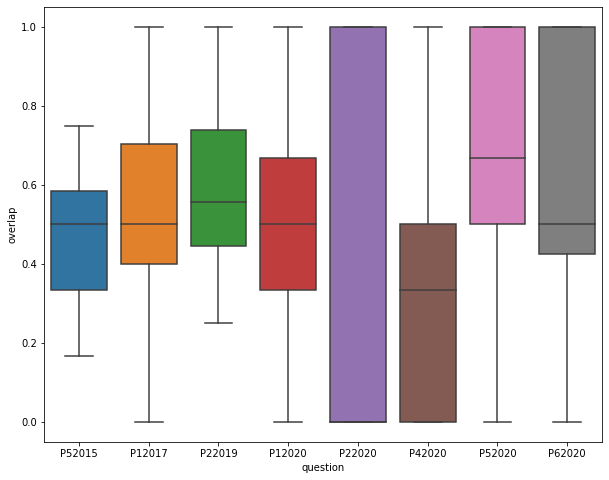

In [18]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 8)
ax = sns.boxplot(x="question", y="overlap", data=df_overlap_preguntas)

In [25]:
estadisticas = df_overlap_preguntas.groupby(by=['question']).mean()
estadisticas

,overlap
question,
P12017,0.558486
P12020,0.492063
P22019,0.582640
P22020,0.394662
P42020,0.344258
P52015,0.480655
P52020,0.654631
P62020,0.597009


In [24]:
df_overlap_preguntas.groupby(by=['question'])['overlap'].var(ddof=0)

question
P12017    0.050370
P12020    0.091253
P22019    0.039969
P22020    0.195602
P42020    0.145853
P52015    0.031217
P52020    0.096569
P62020    0.098267
Name: overlap, dtype: float64

In [23]:
df_overlap_preguntas.groupby(by=['question'])['overlap'].std(ddof=0)

question
P12017    0.224433
P12020    0.302081
P22019    0.199922
P22020    0.442269
P42020    0.381907
P52015    0.176684
P52020    0.310756
P62020    0.313476
Name: overlap, dtype: float64

(array([78.,  0.,  1.,  6.,  0., 18.,  2.,  0.,  1., 47.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

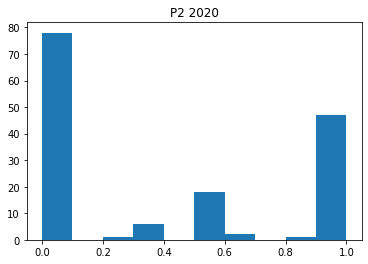

In [27]:
plt.title('P2 2020')
plt.hist(df_overlap_preguntas[df_overlap_preguntas['question']=='P22020']['overlap'])